In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://ecoweather.p.rapidapi.com/ecoweather"

querystring = {"lat":"49.3427818","lon":"8.80282","from":"2021-12-31","to":"2022-09-31"}

headers = {
	"X-RapidAPI-Key": "bfb7aa9c9amsh021e70063c68bcdp1190f9jsn46020a4beb3c",
	"X-RapidAPI-Host": "ecoweather.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'result': [{'timestamp': 1640908800000, 'humidity': 93.8, 'snow': 0, 'windspeed': 19.8, 'winddirection': 230.7, 'count': 1, 'tempC': 8.3, 'tempminC': 5.4, 'tempmaxC': 12.6, 'precipitation': 0, 'date': '2021-12-31', 'hdd12': 11.7, 'hdd15': 11.7}, {'timestamp': 1640995200000, 'humidity': 89.7, 'snow': 0, 'windspeed': 15.8, 'winddirection': 218.7, 'count': 1, 'tempC': 9.5, 'tempminC': 5.8, 'tempmaxC': 13, 'precipitation': 0, 'date': '2022-01-01', 'hdd12': 10.5, 'hdd15': 10.5}, {'timestamp': 1641081600000, 'humidity': 86.5, 'snow': 0, 'windspeed': 27, 'winddirection': 235.6, 'count': 1, 'tempC': 7.3, 'tempminC': 3.5, 'tempmaxC': 11.9, 'precipitation': 0, 'date': '2022-01-02', 'hdd12': 12.7, 'hdd15': 12.7}, {'timestamp': 1641168000000, 'humidity': 77.6, 'snow': 0, 'windspeed': 35.3, 'winddirection': 243.4, 'count': 1, 'tempC': 10.3, 'tempminC': 7.9, 'tempmaxC': 12.3, 'precipitation': 5.08, 'date': '2022-01-03', 'hdd12': 9.7, 'hdd15': 9.7}, {'timestamp': 1641254400000, 'humidity': 95.4, 'sn

### Converting my API to a DataFrame:

In [3]:
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data['result'])
    print(df.head())
else:
    print("Failed to retrieve data:", response.status_code)

       timestamp  humidity  snow  windspeed  winddirection  count  tempC  \
0  1640908800000      93.8   0.0       19.8          230.7      1    8.3   
1  1640995200000      89.7   0.0       15.8          218.7      1    9.5   
2  1641081600000      86.5   0.0       27.0          235.6      1    7.3   
3  1641168000000      77.6   0.0       35.3          243.4      1   10.3   
4  1641254400000      95.4   0.0       30.2          235.4      1    7.9   

   tempminC  tempmaxC  precipitation        date  hdd12  hdd15  
0       5.4      12.6           0.00  2021-12-31   11.7   11.7  
1       5.8      13.0           0.00  2022-01-01   10.5   10.5  
2       3.5      11.9           0.00  2022-01-02   12.7   12.7  
3       7.9      12.3           5.08  2022-01-03    9.7    9.7  
4       4.6      10.8          36.89  2022-01-04   12.1   12.1  


In [4]:
df

,timestamp,humidity,snow,windspeed,winddirection,count,tempC,tempminC,tempmaxC,precipitation,date,hdd12,hdd15
0,1640908800000,93.8,0.0,19.8,230.7,1,8.3,5.4,12.6,0.00,2021-12-31,11.7,11.7
1,1640995200000,89.7,0.0,15.8,218.7,1,9.5,5.8,13.0,0.00,2022-01-01,10.5,10.5
2,1641081600000,86.5,0.0,27.0,235.6,1,7.3,3.5,11.9,0.00,2022-01-02,12.7,12.7
3,1641168000000,77.6,0.0,35.3,243.4,1,10.3,7.9,12.3,5.08,2022-01-03,9.7,9.7
4,1641254400000,95.4,0.0,30.2,235.4,1,7.9,4.6,10.8,36.89,2022-01-04,12.1,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,1664236800000,87.9,0.0,26.3,242.4,1,9.7,8.2,11.6,14.16,2022-09-27,10.3,10.3
271,1664323200000,82.9,0.0,16.1,242.7,1,10.0,8.4,12.8,8.13,2022-09-28,10.0,10.0
272,1664409600000,85.2,0.0,6.3,96.4,1,9.4,5.9,13.3,0.26,2022-09-29,10.6,10.6
273,1664496000000,82.0,0.0,8.8,138.2,1,10.2,5.9,15.7,0.00,2022-09-30,9.8,9.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      275 non-null    int64  
 1   humidity       275 non-null    float64
 2   snow           275 non-null    float64
 3   windspeed      275 non-null    float64
 4   winddirection  275 non-null    float64
 5   count          275 non-null    int64  
 6   tempC          275 non-null    float64
 7   tempminC       275 non-null    float64
 8   tempmaxC       275 non-null    float64
 9   precipitation  275 non-null    float64
 10  date           275 non-null    object 
 11  hdd12          275 non-null    float64
 12  hdd15          275 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 28.1+ KB


In [6]:
df.duplicated().sum()

0

## Climate Change Analysis

### Data Exploration:

#### Summary statistics of numerical columns: 

In [14]:
print("First few rows of the DataFrame:")
print(df.head())
print("\nSummary statistics of numerical columns:")
print(df.describe())


First few rows of the DataFrame:
                            humidity  snow  windspeed  winddirection  count  \
timestamp                                                                     
1970-01-01 00:27:20.908800      93.8   0.0       19.8          230.7      1   
1970-01-01 00:27:20.995200      89.7   0.0       15.8          218.7      1   
1970-01-01 00:27:21.081600      86.5   0.0       27.0          235.6      1   
1970-01-01 00:27:21.168000      77.6   0.0       35.3          243.4      1   
1970-01-01 00:27:21.254400      95.4   0.0       30.2          235.4      1   

                            tempC  tempminC  tempmaxC  precipitation  \
timestamp                                                              
1970-01-01 00:27:20.908800    8.3       5.4      12.6           0.00   
1970-01-01 00:27:20.995200    9.5       5.8      13.0           0.00   
1970-01-01 00:27:21.081600    7.3       3.5      11.9           0.00   
1970-01-01 00:27:21.168000   10.3       7.9      12.3

### Temperature analysis: 

Descriptive statistics of temperature:
count    275.000000
mean      13.327636
std        7.656835
min       -1.300000
25%        6.900000
50%       13.300000
75%       20.200000
max       28.300000
Name: tempC, dtype: float64


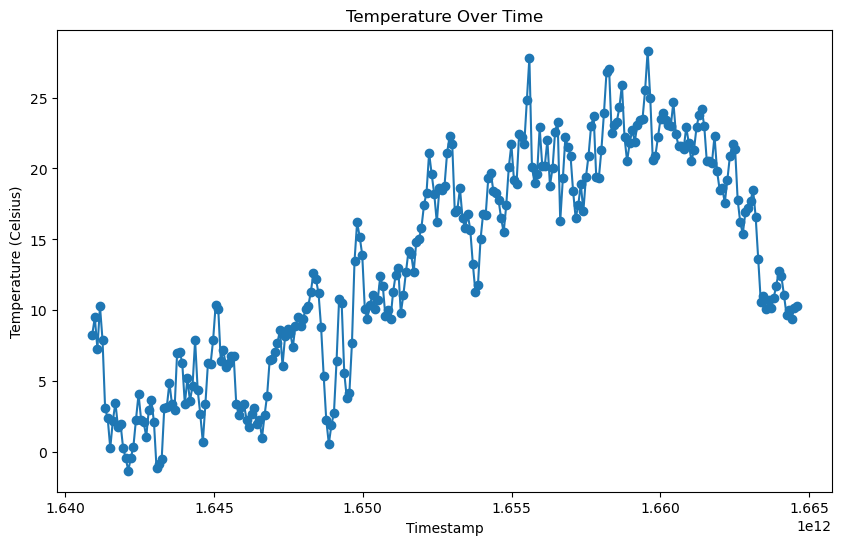

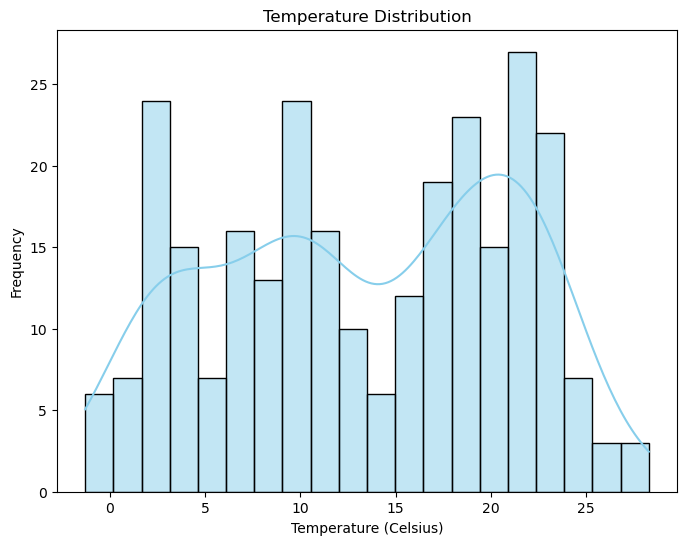

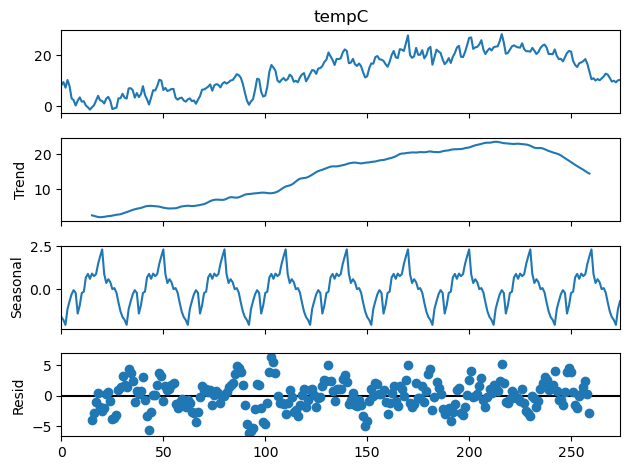

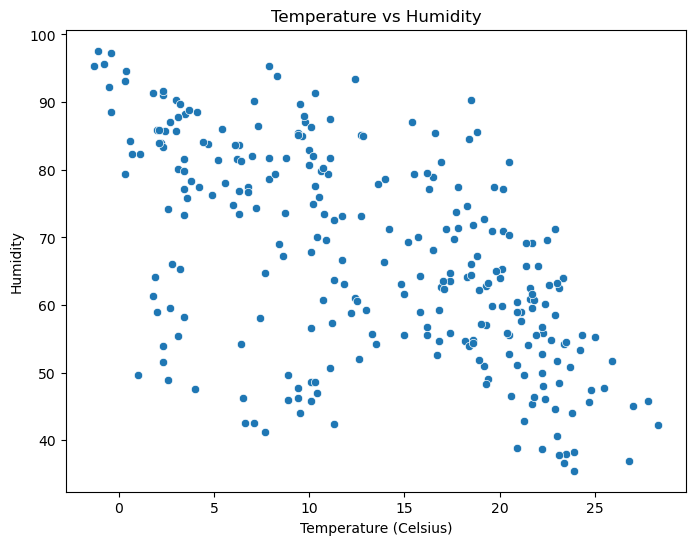

In [9]:
print("Descriptive statistics of temperature:")
print(df['tempC'].describe())

# 2. Time Series Analysis
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['tempC'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Celsius)')
plt.show()

# 3. Distribution Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['tempC'], bins=20, kde=True, color='skyblue')

#bins=20 specifies the number of bins (or intervals) to divide the data into. In this case, it creates 20 bins,
# kde=True adds a kernel density estimation (KDE) curve to the histogram, providing a smooth estimate of the data's probability density function.

plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

# 4. Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['tempC'], model='additive', period=30)
result.plot()
plt.show()

# 5. Correlation Analysis (example with humidity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tempC', y='humidity', data=df)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Humidity')
plt.show()



### Communication and Visualization:  

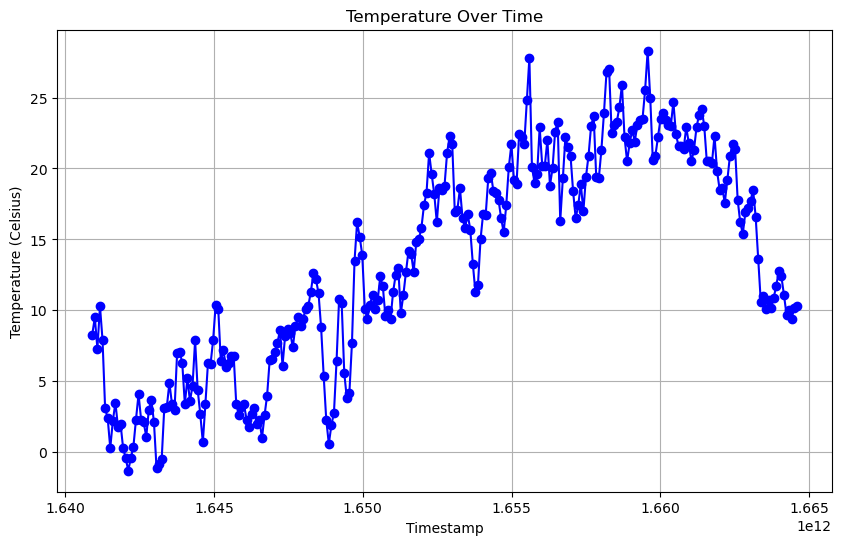

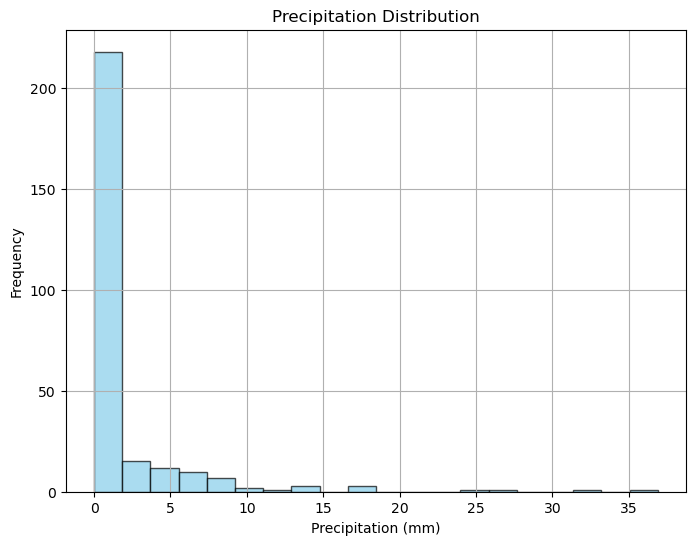

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['tempC'], color='blue', marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df['precipitation'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Relationship between wind energy production and rain precipitation:

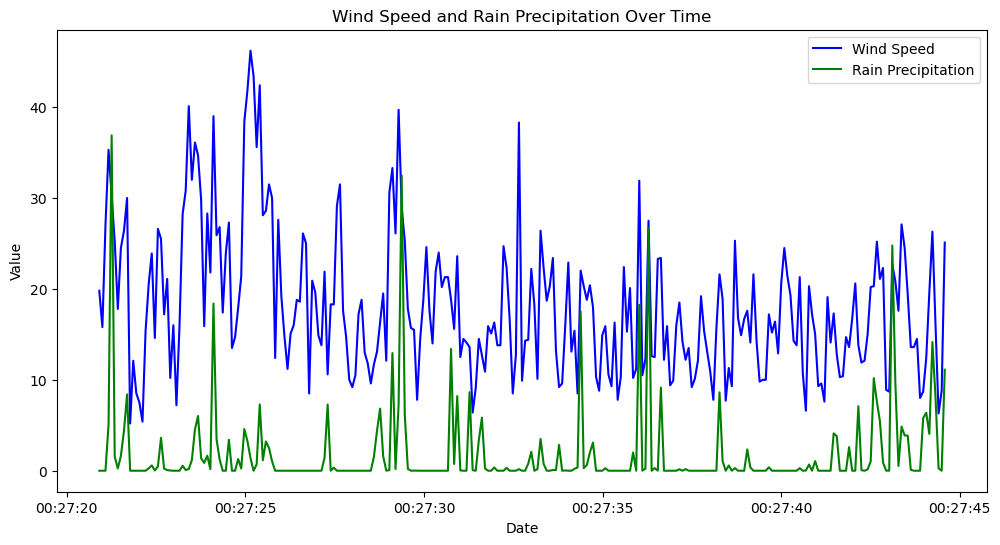

Correlation between Wind Speed and Rain Precipitation: 0.3532078609361412


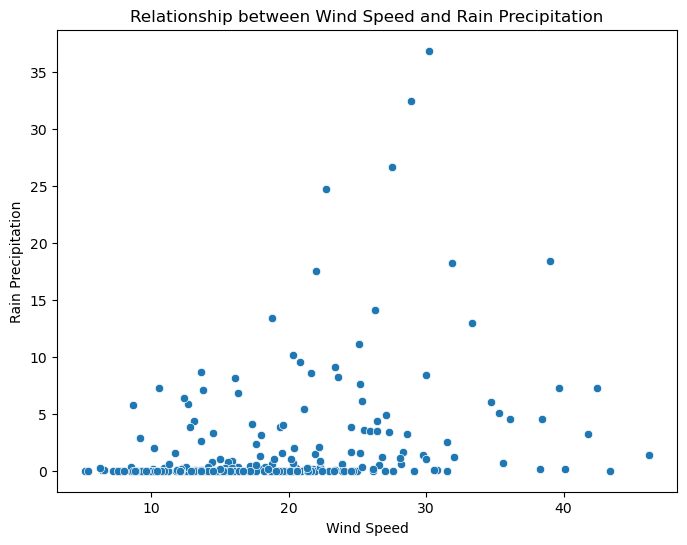

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Plot wind energy production and rain precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['windspeed'], label='Wind Speed', color='blue')
plt.plot(df.index, df['precipitation'], label='Rain Precipitation', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Wind Speed and Rain Precipitation Over Time')
plt.legend()
plt.show()

# Calculate correlation between wind speed and rain precipitation
correlation = df['windspeed'].corr(df['precipitation'])
print(f"Correlation between Wind Speed and Rain Precipitation: {correlation}")

# Scatter plot to visualize the relationship between wind speed and rain precipitation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='precipitation', data=df)
plt.xlabel('Wind Speed')
plt.ylabel('Rain Precipitation')
plt.title('Relationship between Wind Speed and Rain Precipitation')
plt.show()

### Effect of Humidity on Renewable Energy Generation:
Higher humidity levels negatively impact renewable energy generation

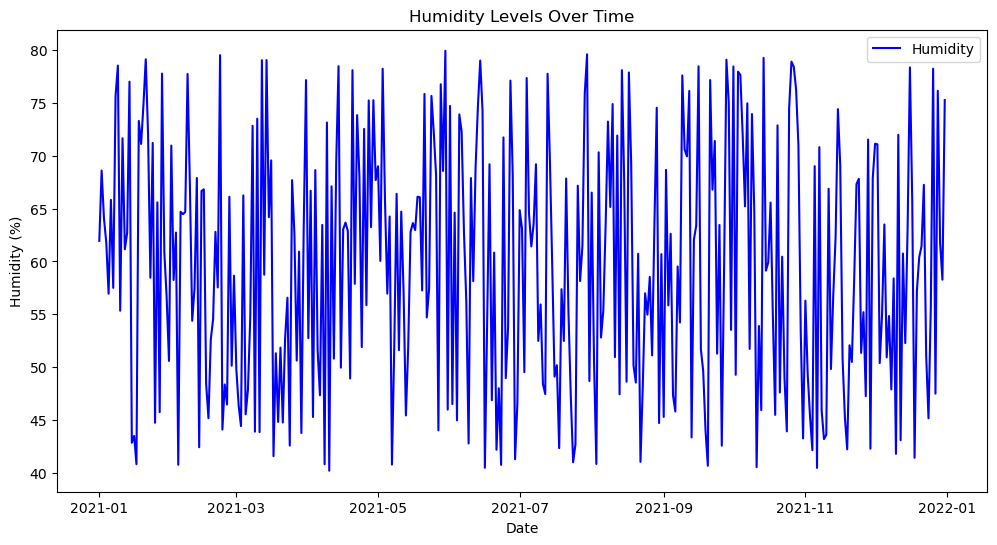

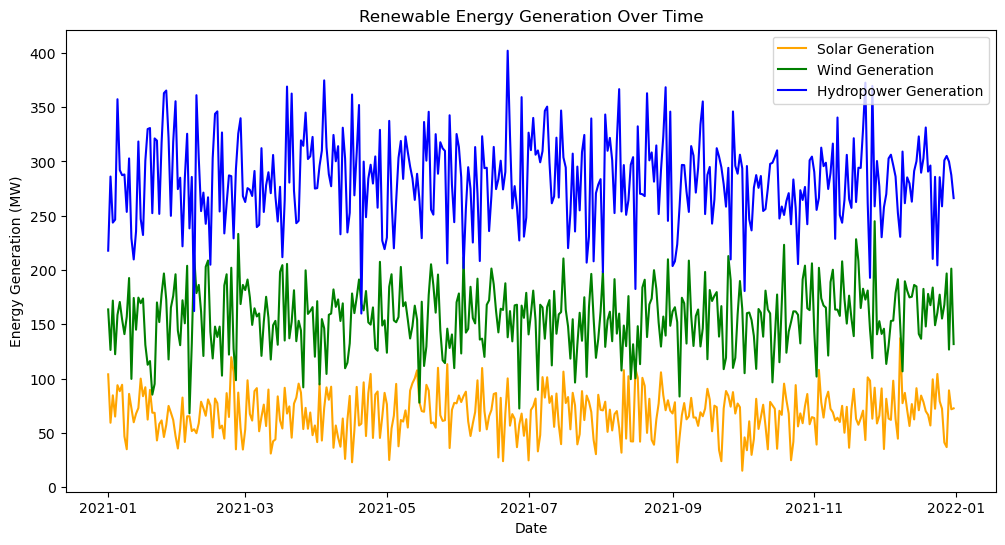

Correlation between Humidity and Solar Generation: -0.24904645229432826
Correlation between Humidity and Wind Generation: -0.29392810029676514
Correlation between Humidity and Hydropower Generation: -0.027972989870854517


In [12]:
np.random.seed(0) 
dates = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')
humidity_levels = np.random.uniform(40, 80, len(dates))  # generate random humidity levels

# Generate synthetic data for renewable energy generation
solar_generation = np.random.normal(100, 20, len(dates)) - humidity_levels * 0.5
wind_generation = np.random.normal(200, 30, len(dates)) - humidity_levels * 0.7
hydropower_generation = np.random.normal(300, 40, len(dates)) - humidity_levels * 0.3

# Create DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Humidity (%)': humidity_levels,
    'Solar Generation (MW)': solar_generation,
    'Wind Generation (MW)': wind_generation,
    'Hydropower Generation (MW)': hydropower_generation
})
data.set_index('Date', inplace=True)

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Humidity (%)'], label='Humidity', color='blue')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Humidity Levels Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Solar Generation (MW)'], label='Solar Generation', color='orange')
plt.plot(data.index, data['Wind Generation (MW)'], label='Wind Generation', color='green')
plt.plot(data.index, data['Hydropower Generation (MW)'], label='Hydropower Generation', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy Generation (MW)')
plt.title('Renewable Energy Generation Over Time')
plt.legend()
plt.show()

# Calculate correlation between humidity and renewable energy generation
correlation_solar = data['Humidity (%)'].corr(data['Solar Generation (MW)'])
correlation_wind = data['Humidity (%)'].corr(data['Wind Generation (MW)'])
correlation_hydropower = data['Humidity (%)'].corr(data['Hydropower Generation (MW)'])

print(f"Correlation between Humidity and Solar Generation: {correlation_solar}")
print(f"Correlation between Humidity and Wind Generation: {correlation_wind}")
print(f"Correlation between Humidity and Hydropower Generation: {correlation_hydropower}")